In [1]:
# Importo las librerias que voy a usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Leo el dataset de mi disco local correspondiente a la tabla "InvoicePurchases12312016"

df_ruta_data= r'C:\Users\fel-p\Documents\DATA_ANALITYCS_Henry\PF\archive (2)\InvoicePurchases12312016.csv'

df_facturas_compra= pd.read_csv(df_ruta_data)

# Compruebo que se haya cargado correctamente, verificando las 5 primeras filas
print(df_facturas_compra.head())

   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47      NaN  
1  2015-12-22  2016-02-21        15     140.55     8.57      NaN  
2  2015-12-24  2016-02-16         5     106.60     4.61      NaN  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20      NaN  
4  2015-12-24  2016-02-12      1935   15527.25   429.20      NaN  


In [3]:
# Mostrar número de filas y columnas
filas, columnas = df_facturas_compra.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 5543
Número de columnas: 10


Quiero ver los valores que se repiten en las columnas 

In [4]:
# cuantos y cuales son los valoreas unicos de la columna Approval
print(f"se cuenta con {df_facturas_compra["Approval"].nunique()} valor único")
print(df_facturas_compra["Approval"].unique())


se cuenta con 1 valor único
[nan 'Frank Delahunt']


In [5]:
# cuantos y cuales son los valoreas unicos de la columna VendorNumber
print(f"se cuenta con {df_facturas_compra["VendorNumber"].nunique()} valores únicos")
print(df_facturas_compra["VendorNumber"].unique())

se cuenta con 126 valores únicos
[   105   4466    388    480    516   2396   1128   1189   1273  11567
  90046   1485   2876   4380   1392  90047   2242   1590   3960   2555
   2450   2496   3252   2561   1655  17031  90011   9744   3924   3950
  90053  17032  12546   4550   4692  90032   4848   4950   8352   9552
  10000   5455   4425   5992   6213   8112   6215   6355   6359   6785
  10754  17035   9206   7153  90027   7154   7245   7255   7239  10050
   8004    660   8150  98450   8320   3089   2000   8663    653   8673
   8664   8735  90056   8920  28776   9819   8892   9165   9751  90010
   1587  90024   1601   9622   9625   3664   9815  90058    287   1003
  17037  90051  90052   7240  17033  28750  12331  90037   9260   1265
   1650 173357  90017  90057   5612   1703   1439   5270   7749 172662
   6280   3951   6830      2  90026  90033     60    200   9099  99166
   3551 201359   4901  90059   5083     54]


In [6]:
# cuantos y cuales son los valoreas unicos de la columna VendorName
print(f"se cuenta con {df_facturas_compra["VendorName"].nunique()} valores únicos")
print(df_facturas_compra["VendorName"].unique())

se cuenta con 129 valores únicos
['ALTAMAR BRANDS LLC         ' 'AMERICAN VINTAGE BEVERAGE  '
 'ATLANTIC IMPORTING COMPANY ' 'BACARDI USA INC            '
 'BANFI PRODUCTS CORP        ' 'BLACK PRINCE DISTILLERY INC'
 'BROWN-FORMAN CORP          ' 'BULLY BOY DISTILLERS       '
 'CALEDONIA SPIRITS INC      ' 'CAMPARI AMERICA            '
 'CANDIA VINEYARDS           ' 'CASTLE BRANDS CORP.        '
 'CENTEUR IMPORTS LLC        ' 'CHARLES JACQUIN ET CIE INC '
 'CONSTELLATION BRANDS INC   ' 'CRUSH WINES                '
 'DELICATO VINEYARDS INC     ' 'DIAGEO CHATEAU ESTATE WINES'
 'DIAGEO NORTH AMERICA INC   ' 'DISARONNO INTERNATIONAL LLC'
 'DJINN SPIRITS LLC          ' 'DUGGANS DISTILLED PRODUCTS '
 'E & J GALLO WINERY         ' 'EDRINGTON AMERICAS         '
 'FABRIZIA SPIRITS LLC       ' 'FLAG HILL WINERY & VINEYARD'
 'FORTUNE WINE BROKERS LLC   ' 'FREDERICK WILDMAN & SONS   '
 'HEAVEN HILL DISTILLERIES   ' 'HOOD RIVER DISTILLERS, Inc.'
 'INCREDIBREW INC            ' 'JEWELL TOWNE VINEYAR

hay 3 vendedores que no cuentan con numero de vendedor puesto que hay 126 numeros de vendedor y 129 vendedores en el proceso ETL se procede a solucionarlo

Medidas de disperción central para análisis exploratorio

In [7]:
# Seleccionar solo columnas numéricas
columnas_numericas = df_facturas_compra[["Quantity","Dollars","Freight"]]

print(columnas_numericas.columns)

Index(['Quantity', 'Dollars', 'Freight'], dtype='object')


In [8]:
columnas_numericas.describe().T


,count,mean,std,min,25%,50%,75%,max
Quantity,5543.0,6058.880931,14453.338164,1.00,83.00,423.00,5100.500,141660.00
Dollars,5543.0,58073.383642,140234.031377,4.14,967.81,4765.45,44587.175,1660435.88
Freight,5543.0,295.954301,713.585093,0.02,5.02,24.73,229.660,8468.22


Detección de nulos

In [9]:
# Cuantas filas quedarían si elimino todas las filas con NaN
print("Filas que quedarían si elimino las filas con NaN:", len(df_facturas_compra.dropna()))

# conteo de NaN por columna
print("Filas con valores NaN en cada columna  \n", df_facturas_compra.isna().sum())

Filas que quedarían si elimino las filas con NaN: 374
Filas con valores NaN en cada columna  
 VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


Esos nulos encontrados se manejarán en el proceso ETL

Quiero verificar la existencia de valores negativos en el csv que estoy explorando.

In [ ]:
# Para verificar la existencia de valores negativos en las columnas numericas de la tabla que estoy explorando

(df_facturas_compra [["Quantity","Dollars", "Freight"]]< 0).any().any()


np.False_

Al dar False significa que no se cuenta con valores negativos

Con las columnas numericas hago un grafico de caja para analizar la dispersión de los datos

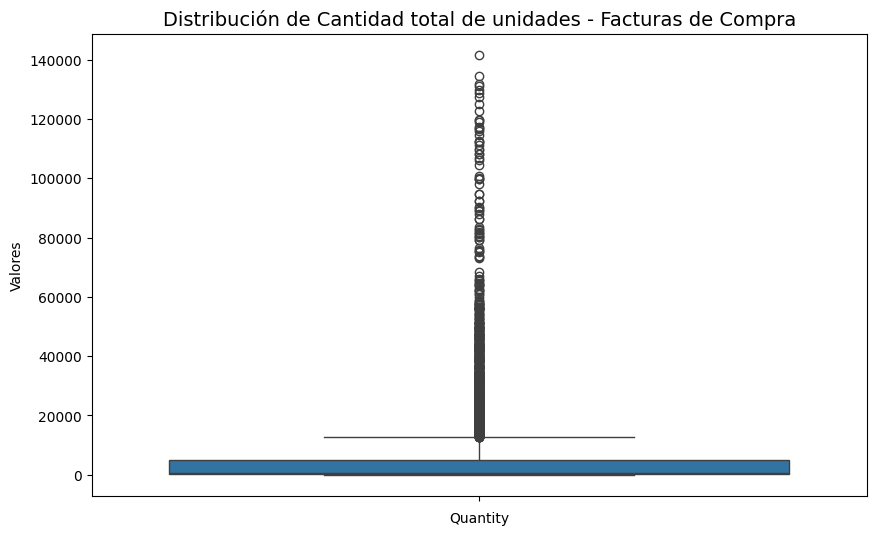

In [ ]:

# Crear la figura
plt.figure(figsize=(10, 6))

# Generar el boxplot
sns.boxplot(data=df_facturas_compra["Quantity"])

# Título y etiquetas
plt.title("Distribución de Cantidad total de unidades - Facturas de Compra", fontsize=14)
plt.xlabel("Quantity")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()



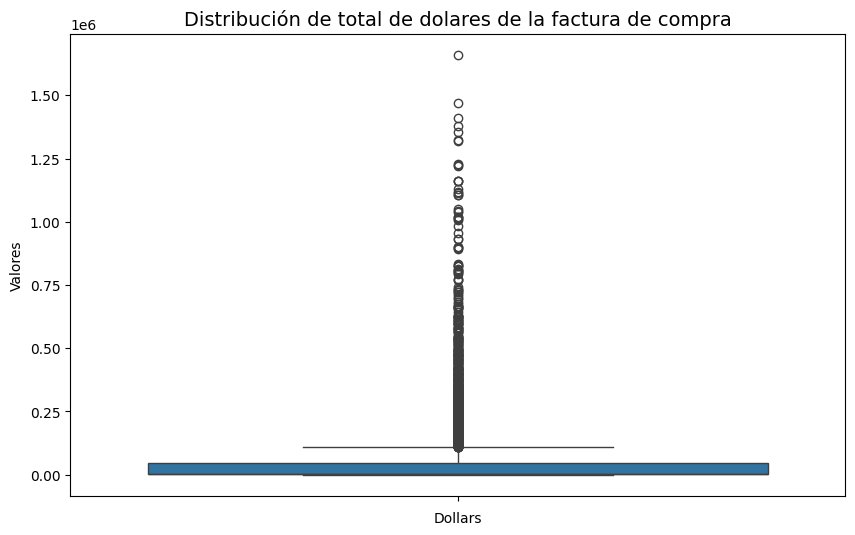

In [ ]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Generar el boxplot
sns.boxplot(data=df_facturas_compra["Dollars"])

# Título y etiquetas
plt.title("Distribución de total de dolares de la factura de compra", fontsize=14)
plt.xlabel("Dollars")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()

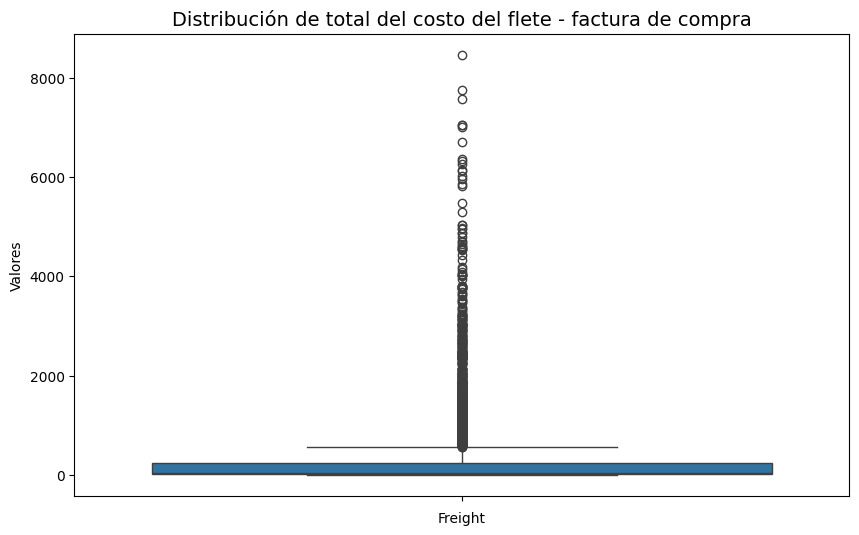

In [ ]:

# Crear la figura
plt.figure(figsize=(10, 6))

# Generar el boxplot
sns.boxplot(data=df_facturas_compra["Freight"])

# Título y etiquetas
plt.title("Distribución de total del costo del flete - factura de compra", fontsize=14)
plt.xlabel("Freight")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()

Se ientifican outliers en las tres columnas de valores numericos en el proceso de ETL se dará manejo